## 1. Loading and Displaying Well Data From CSV

Created By: Andy McDonald

The following tutorial illustrates loading basic well log data from a csv file by using pandas, and displaying the data using the plotting option available in pandas. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
well = pd.read_csv("data/L0509WellData.csv", header=1)

To check that the data has been loaded in correctly, we can use the .head() function in pandas to view the first 5 rows and the header.

In [3]:
well.head()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
0,81.0,-999.25,-999.25,-999.25,-999.25,-999.25
1,81.1,-999.25,-999.25,-999.25,-999.25,-999.25
2,81.2,-999.25,-999.25,-999.25,-999.25,-999.25
3,81.3,-999.25,-999.25,-999.25,-999.25,-999.25
4,81.4,-999.25,-999.25,-999.25,-999.25,-999.25


We can also view some statistics on the curves by using the describe() function.

In [4]:
well.describe()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
count,47988.000000,47988.000000,47988.000000,47988.000000,47988.000000,47988.000000
mean,2480.350176,35.716497,-516.252747,-955.931615,-956.041697,-934.792561
std,1385.308778,29.139820,531.428666,203.767807,203.249986,245.491558
min,81.000000,-999.250000,-999.250000,-999.250000,-999.250000,-999.250000
25%,1280.675200,22.701997,-999.250000,-999.250000,-999.250000,-999.250000
50%,2480.350400,29.760645,-999.250000,-999.250000,-999.250000,-999.250000
75%,3680.025400,37.513466,68.510314,-999.250000,-999.250000,-999.250000
max,4879.700600,218.201477,120.170410,2.788836,0.134148,0.417384


Before carrying out any displaying of data or calculations, we carry out some data cleansing. The first is the conversion of null values, represented by -999.25, to a Not a Number (NaN). We can achieve this using the replace function.

In [5]:
well.replace(-999.25, np.nan, inplace=True)

If we now call the describe and head functions on the well dataframe, we can see that the nulls have been been replaced.

In [6]:
well.describe()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
count,47988.000000,47974.000000,21709.000000,2075.000000,2075.000000,3095.000000
mean,2480.350176,36.018526,68.421113,2.563334,0.017502,0.163118
std,1385.308778,23.166559,5.695408,0.121987,0.045110,0.079184
min,81.000000,12.019911,45.813599,1.947107,-0.132031,0.033476
25%,1280.675200,22.705840,67.387177,2.499617,-0.015359,0.100890
50%,2480.350400,29.765934,68.658997,2.570223,0.002509,0.130982
75%,3680.025400,37.515741,69.358810,2.660643,0.048985,0.229602
max,4879.700600,218.201477,120.170410,2.788836,0.134148,0.417384


In [7]:
well.head()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
0,81.0,NaN,NaN,NaN,NaN,NaN
1,81.1,NaN,NaN,NaN,NaN,NaN
2,81.2,NaN,NaN,NaN,NaN,NaN
3,81.3,NaN,NaN,NaN,NaN,NaN
4,81.4,NaN,NaN,NaN,NaN,NaN


By default, the well.head() function produces the first 5 rows of data. We can extend this by passing in a value to the head function.

In [8]:
well.head(20)

,DEPTH,GR,DT,RHOB,DRHO,NPHI
0,81.0,NaN,NaN,NaN,NaN,NaN
1,81.1,NaN,NaN,NaN,NaN,NaN
2,81.2,NaN,NaN,NaN,NaN,NaN
3,81.3,NaN,NaN,NaN,NaN,NaN
4,81.4,NaN,NaN,NaN,NaN,NaN
5,81.5,NaN,NaN,NaN,NaN,NaN
6,81.6,NaN,NaN,NaN,NaN,NaN
7,81.7,NaN,NaN,NaN,NaN,NaN
8,81.8,NaN,NaN,NaN,NaN,NaN
9,81.9,NaN,NaN,NaN,NaN,NaN


Now we have some data appearing in the GR column.

### Viewing Data on a Log Plot

With pandas, we can quickly bring up a plot of our well data by using the .plot() function on our well dataframe. <br><br>If we just specify the x and y axis, we can generate a simple line plot.

In [9]:
well.plot(x = 'DEPTH', y = 'GR')

We can change the type of plot by using the keyword kind and passing in the word scatter. In this example we have a familiar density neutron crossplot. <b>Note</b> that we can change the y-axis scales so that they are flipped and show increasing porosity as you move up the axis.

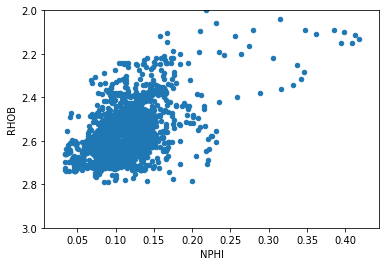

In [10]:
well.plot(kind = 'scatter', x = 'NPHI', y = 'RHOB', ylim=(3, 2))

We can also add some colour to our plot using the gamma ray as a third axis. This is done by including the c argument and specifying the column name. <br><br>
This helps us identify the cleaner intervals from shalier intervals

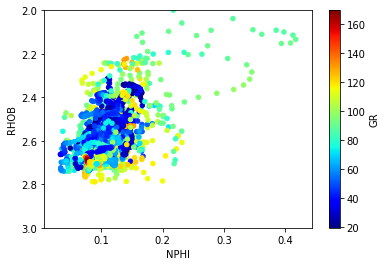

In [11]:
well.plot(kind = 'scatter', x = 'NPHI', y = 'RHOB', c='GR', 
          colormap='jet', 
          ylim=(3, 2))

Data can also be easily displayed as a histogram in the form of bars:

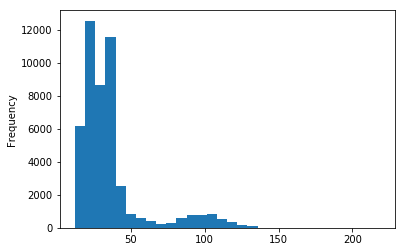

In [12]:
well['GR'].plot(kind="hist", bins = 30)

Or using a Kernel Density Estimate:

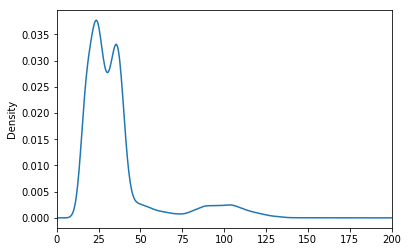

In [13]:
well['GR'].plot(kind="kde", xlim =(0,200))

That is all for this short tutorial. In the next one we will take our plotting to the next level and construct the familiar log plot using matplotlib.